<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px">
# ROC/AUC Lab
Week 4 | Lab 2.4
***

Continuing our practice of classifcation evaluation, understanding the tradeoffs of our `true positive` vs ` false positive` rates will help us tune our models for different real-world applications.



In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


sns.set(rc={"figure.figsize": (12, 12)})

## Load the "Sacramento Realestate Transactions" housing dataset
We did this in our previous lab.

In [2]:
import pandas as pd

df = pd.read_csv("../Documents/DSI-SF-3/datasets/sacramento_real_estate/Sacramentorealestatetransactions.csv")


In [3]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 1. Create a binary variable (call it "over_200") where 1 indicates a house sold for over 200,000 and 0 indicates a house sold for equal to or less than 200,000.

In [4]:
over_200 = df.price.apply(lambda x: 1 if x > 200000 else 0 )
df['over_200'] = over_200

In [5]:
df.over_200.value_counts()

1    538
0    447
Name: over_200, dtype: int64

### 2. Subset the data to just contain the number of beds, baths, the sq ft, and the over 200k indicator / response variable.

Use patsy for this please!  

_Keep in mind the dimensionality of your target **y** when fitting your model._

In [6]:
df.columns

Index([u'street', u'city', u'zip', u'state', u'beds', u'baths', u'sq__ft',
       u'type', u'sale_date', u'price', u'latitude', u'longitude',
       u'over_200'],
      dtype='object')

In [7]:
import patsy
formula = 'over_200 ~ beds + baths + sq__ft'

y_mat, x_mat = patsy.dmatrices(formula, data = df)

### 3. Load your design matrix.  Setup a logistic regression classifier with 5 kfolds.
The predictors are the beds, baths, and sq ft. The feature is the over 200k class variable you just created.  

> _The default cross-validation generator used is Stratified K-Folds_

In [8]:
from sklearn.linear_model import LogisticRegressionCV

y_mat = np.ravel(y_mat)

logreg = LogisticRegressionCV(cv = 5)
logreg = logreg.fit(x_mat,y_mat)

In [9]:
logreg

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

### 4. Predict and score your logistic model.

In [10]:
print logreg.score(x_mat,y_mat)

0.610152284264


In [12]:
y_preds = logreg.predict_proba(x_mat)
print y_preds

[[ 0.58733221  0.41266779]
 [ 0.58042441  0.41957559]
 [ 0.59184216  0.40815784]
 ..., 
 [ 0.42999482  0.57000518]
 [ 0.40742846  0.59257154]
 [ 0.41340616  0.58659384]]


### 5. Plot the ROC curve using the following code.

**Review: What is the intuition for the ROC curve?**

As the class assignment threshold increases for the positive class (1 == properties over 200k), the false positive rate and true positive rate necessarily increase. For a classifier performing at chance, this would be the diagonal dotted line: an equal chance of false positives and true positives.

- The greater the area under the curve, the better higher the quality of the model
- The greater the area under the curve, the higher the ratio of true positives to false positives as the threshold becomes more lenient. Thus, the greater the area under the curve, the higher the quality of the classification model.

** Also, document what each section is.  Use as much detail possible, as if you were to return in 6 months and this code would be a complete mystery to you. **

In [16]:
y_preds[:,1] # what is this vrushank

array([ 0.41266779,  0.41957559,  0.40815784,  0.41447593,  0.4082704 ,
        0.41447797,  0.55717014,  0.42071077,  0.56943199,  0.56199318,
        0.53465019,  0.5783216 ,  0.44748464,  0.40299251,  0.57866041,
        0.59132943,  0.41357157,  0.40804529,  0.3849701 ,  0.5859157 ,
        0.55877907,  0.55199271,  0.54171657,  0.61331446,  0.53372263,
        0.5553299 ,  0.39661935,  0.55889394,  0.5578619 ,  0.57365589,
        0.5805905 ,  0.56268125,  0.58862627,  0.55854929,  0.5805905 ,
        0.59290696,  0.55463942,  0.56840763,  0.53082463,  0.43473443,
        0.61032457,  0.56897702,  0.55164492,  0.58104429,  0.58150203,
        0.38409187,  0.58070806,  0.47922661,  0.58930511,  0.59952522,
        0.56680454,  0.58184217,  0.59795797,  0.59582981,  0.56646127,
        0.59155665,  0.62124203,  0.56497307,  0.41787442,  0.73798301,
        0.56989097,  0.56015716,  0.58331522,  0.4553351 ,  0.59313187,
        0.57729859,  0.61165555,  0.58659384,  0.85370749,  0.57

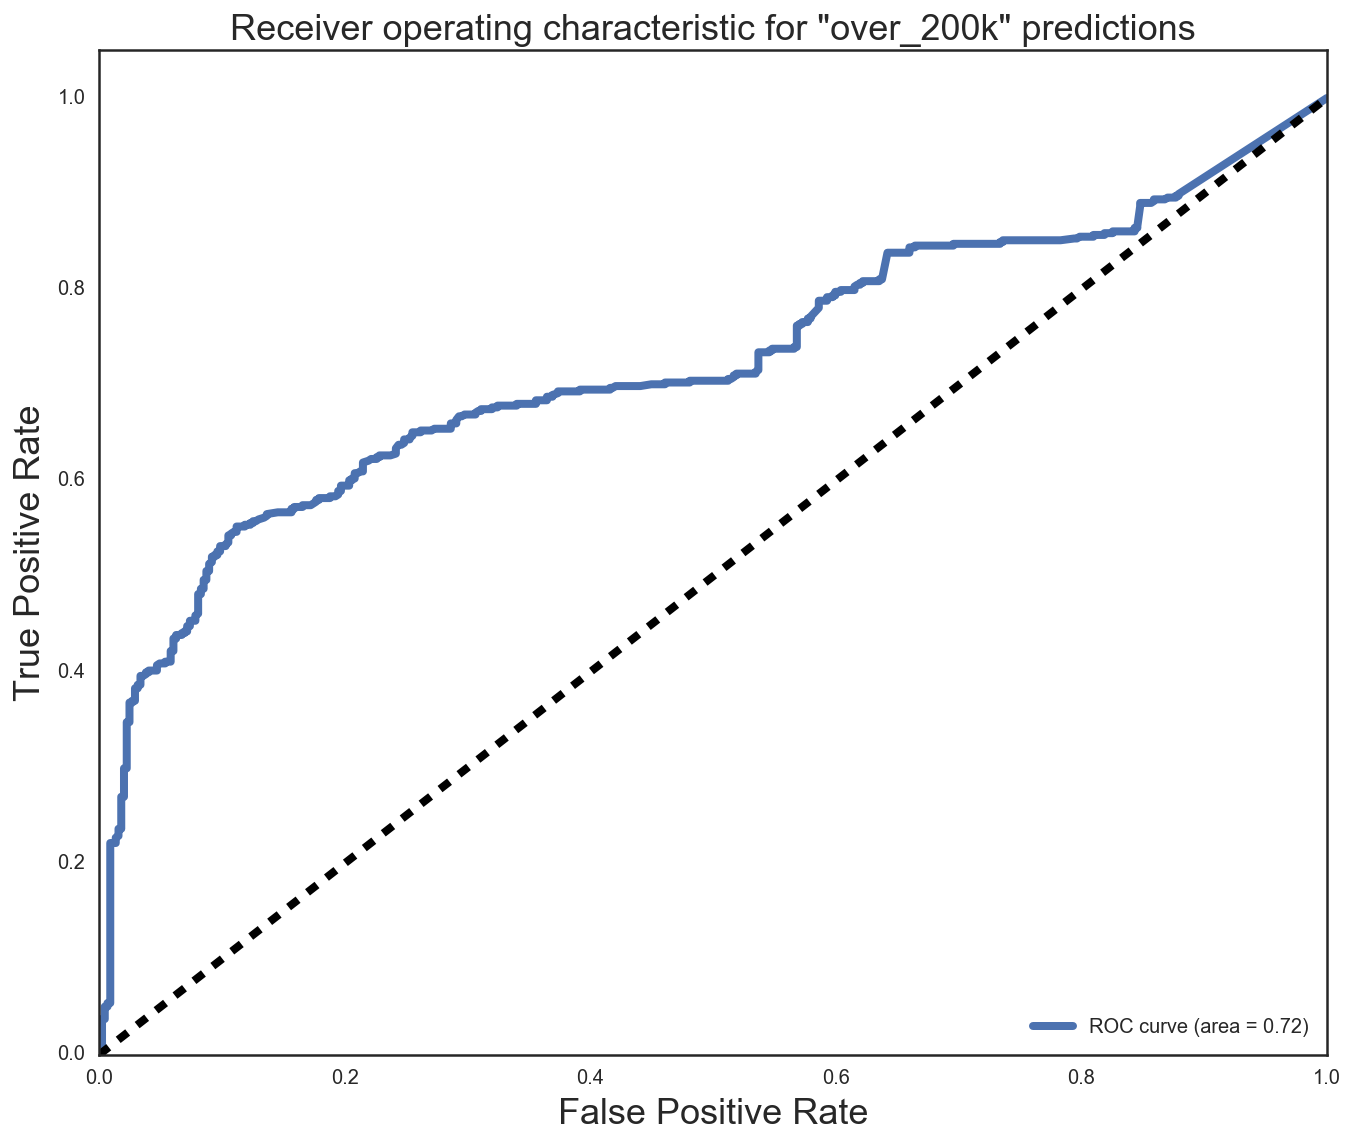

In [17]:
from sklearn.metrics import roc_curve, auc
sns.set_style('white')
# [insert explanation of this section -- what is this for?  Where do we use this later?]
Y_score = logreg.decision_function(x_mat)

# [insert explanation of this section -- why do we use these?]
FPR = dict()
TPR = dict()
ROC_AUC = dict()

# [insert explanation of this section]  
FPR[1], TPR[1], _ = roc_curve(y_mat, y_preds[:, 1])     # ytrue vs yscore of probabilities
ROC_AUC[1] = auc(FPR[1], TPR[1])

# [insert explanation of this section -- what is being plotted?  Which elements are data driven?  Which elements are purely visual?]
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for "over_200k" predictions', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [19]:
from sklearn.metrics import roc_curve, auc

# [insert explanation of this section -- what is this for?  Where do we use this later?]
Y_score = logreg.decision_function(x_mat)

# [insert explanation of this section -- why do we use these?]
FPR = dict()
TPR = dict()
ROC_AUC = dict()

# [insert explanation of this section]
FPR[1], TPR[1], _ = roc_curve(y, probabilities[:, 1])
ROC_AUC[1] = auc(FPR[1], TPR[1])

# [insert explanation of this section -- what is being plotted?  Which elements are data driven?  Which elements are purely visual?]
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for "over_200k" predictions', fontsize=18)
plt.legend(loc="lower right")
plt.show()

NameError: name 'probabilities' is not defined

### 6. Turn the previous block of code into a function

Learning to make your code modular and reusable will save you TONS of time in the future.  Also, learning to document your code properly will save you time re-learning your code, and will help other other learn your code faster.

Using the previous code block, create a function that takes the following parameters:

- Trained / fitted logistic regression model object
- Dataframe / matrix, X
- True values of your target, y
- Predicted probabilities

Try to use named parameters (keyword parameters) for your function so the order in which you specify your parameters will not matter (ie: classifier=lr, data=X, target=y, predict_proba=probabilities).

If you need a refresher, check out this [handy review](http://www.tutorialspoint.com/python/python_functions.htm).

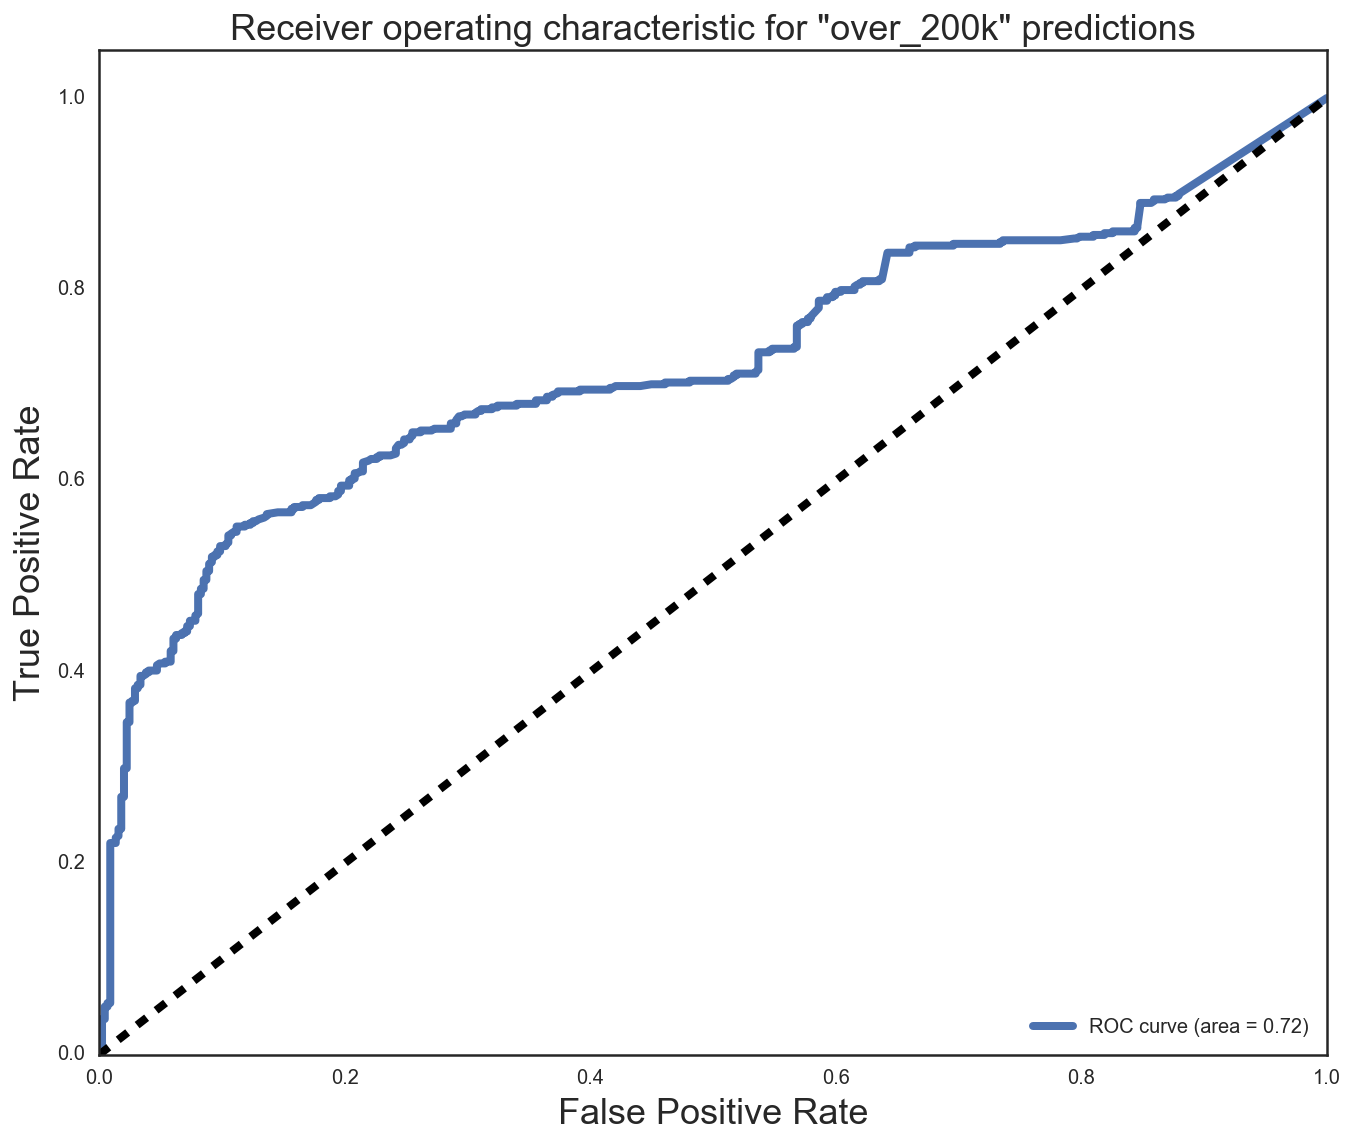

In [20]:
def roc_plotter(logreg, x_mat, y_mat, y_preds):
    # [insert explanation of this section -- what is this for?  Where do we use this later?]
    Y_score = logreg.decision_function(x_mat)

    # [insert explanation of this section -- why do we use these?]
    FPR = dict()
    TPR = dict()
    ROC_AUC = dict()

    # [insert explanation of this section]  
    FPR[1], TPR[1], _ = roc_curve(y_mat, y_preds[:, 1])     # ytrue vs yscore of probabilities
    ROC_AUC[1] = auc(FPR[1], TPR[1])

    # [insert explanation of this section -- what is being plotted?  Which elements are data driven?  Which elements are purely visual?]
    plt.figure(figsize=[11,9])
    plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.title('Receiver operating characteristic for "over_200k" predictions', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()
roc_plotter(logreg, x_mat, y_mat, y_preds)

## 7.  Adjust the threshold of your target to +/- 200k

Does the ROC change at all?  What does this mean?

### 8. Create a few new variables, based on your predicted classes.

Create these variables with the cooresponding probabilities from class 1

- **adj_target_10** - class 1 > .1
- **adj_target_30** - class 1 > .3
- **adj_target_65** - class 1 > .65
- **adj_target_80** - class 1 > .8
- **adj_target_95** - class 1 > .95


### 9. Plot the ROC for these new true targets, adj_target*

How do they change?  

> *These adj-target variables are what you would use in place of *y* for scoring.  This exercize artificially simulates how you might expect ROC to react given different levels of accuracy.*

## Challenge #1

Plot the range ROC of all adj_target* variables on a single plot.

## Challenge #2

Load the abalone dataset, and try a logistic regression using the previous codebase.  Plot the ROC on the dataset.

Standardize your predictors.  How does this impact your accuracy and ROC?

## Challenge #3
Check out the multiroc class and try to get it to work with the setosa dataset (sklearn.datasets import load_iris).  Check the sklearn docs for ROC_CURVE examples for plotting multinomial responses.